# Compare Linear Regerssion and LASSO for Diabetes dataset analysis



Target: a quantitative measure of disease progression one year after baseline

Features: ten numeric predictive values
- age age in years
- sex, bmi body mass index
- bp average blood pressure
- s1 tc
- total serum cholesterol
- s2 ldl, low-density lipoproteins
- s3 hdl, high-density lipoproteins
- s4 tch, total cholesterol / HDL
- s5 ltg, possibly log of serum triglycerides level
- s6 glu, blood sugar level

Source URL: https://www4.stat.ncsu.edu/~boos/var.select/diabetes.html

In [7]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

from sklearn import datasets
from sklearn.linear_model import Lasso # module for LASSO
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

# Read the dataset
data = datasets.load_diabetes()

# Features　(design matrix)
X = data.data
# Target
y = data.target
# feature's names
feature_names = data.feature_names

# Show the datasets
df = pd.DataFrame(X, columns = feature_names)
df['target'] = y
df

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,target
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019907,-0.017646,151.0
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068332,-0.092204,75.0
2,0.085299,0.050680,0.044451,-0.005670,-0.045599,-0.034194,-0.032356,-0.002592,0.002861,-0.025930,141.0
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022688,-0.009362,206.0
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031988,-0.046641,135.0
...,...,...,...,...,...,...,...,...,...,...,...
437,0.041708,0.050680,0.019662,0.059744,-0.005697,-0.002566,-0.028674,-0.002592,0.031193,0.007207,178.0
438,-0.005515,0.050680,-0.015906,-0.067642,0.049341,0.079165,-0.028674,0.034309,-0.018114,0.044485,104.0
439,0.041708,0.050680,-0.015906,0.017293,-0.037344,-0.013840,-0.024993,-0.011080,-0.046883,0.015491,132.0
440,-0.045472,-0.044642,0.039062,0.001215,0.016318,0.015283,-0.028674,0.026560,0.044529,-0.025930,220.0


In [8]:
# Standardizing the design matrix
# In linear regression with regularization terms, standardize the design matrix to equalize the impact of regularization across all variables.
scaler = StandardScaler()
scaler.fit(X)
X_scaled = scaler.transform(X) #Apply the standardization transformation using mean and standard deviation in 'scale'


# Split the dataset into training data and test data in an 80 : 20 ratio
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size = 0.2, random_state = 42)

## LASSO Regression with K-fold cross-validation method


In [51]:
# module for Cross-Validation Methods
from sklearn.model_selection import cross_val_score


start = 1
step = 0.9
n_models = 40
# list for candidate hyperparameters
alpha_list = [start * step ** n for n in range(n_models)]

cv_score_list = []


for alpha in alpha_list:
  lasso = Lasso(alpha = alpha, fit_intercept = True)
  # cv=10 is K value in K-fold cross-validation method
  cv_score = np.mean(cross_val_score(lasso, X_train, y_train, scoring='neg_mean_squared_error', cv=10))
  cv_score_list.append(cv_score)

Optimized alpha: 0.1501


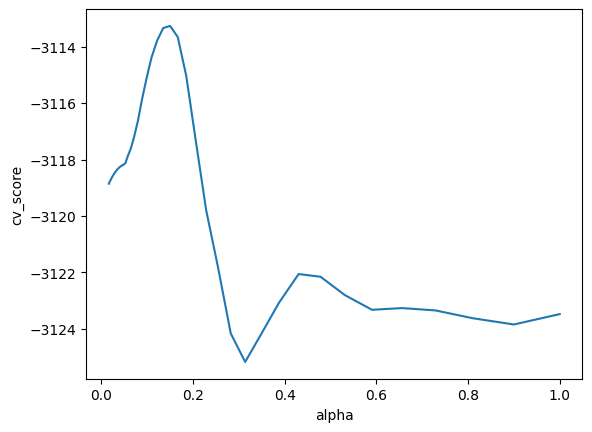

In [52]:
# the index for the best alpha among 40 (n_models) candidates
index_alpha_opt = cv_score_list.index(max(cv_score_list))

print(f'Optimized alpha: {alpha_list[index_alpha_opt]:.4f}')

plt.plot(alpha_list, cv_score_list)
plt.xlabel('alpha')
plt.ylabel('cv_score')
plt.show()

In [53]:
# Optimized LASSO model
lasso_opt = Lasso(alpha = alpha_list[index_alpha_opt], fit_intercept = True)

lasso_opt.fit(X_train, y_train)

y_predict_lasso = lasso_opt.predict(X_test)

## Linear Regression

In [54]:
from sklearn.linear_model import LinearRegression

linear_regr = LinearRegression(fit_intercept = True)

# Fitting
linear_regr.fit(X_train, y_train)

y_predict_linear = linear_regr.predict(X_test)



In [55]:
from sklearn.metrics import mean_squared_error, r2_score

r2_score_lasso = r2_score(y_test, y_predict_lasso)
r2_score_linear = r2_score(y_test, y_predict_linear)

LASSO R^2 Score: 0.45605
Linear Regresssion R^2 Score: 0.45260


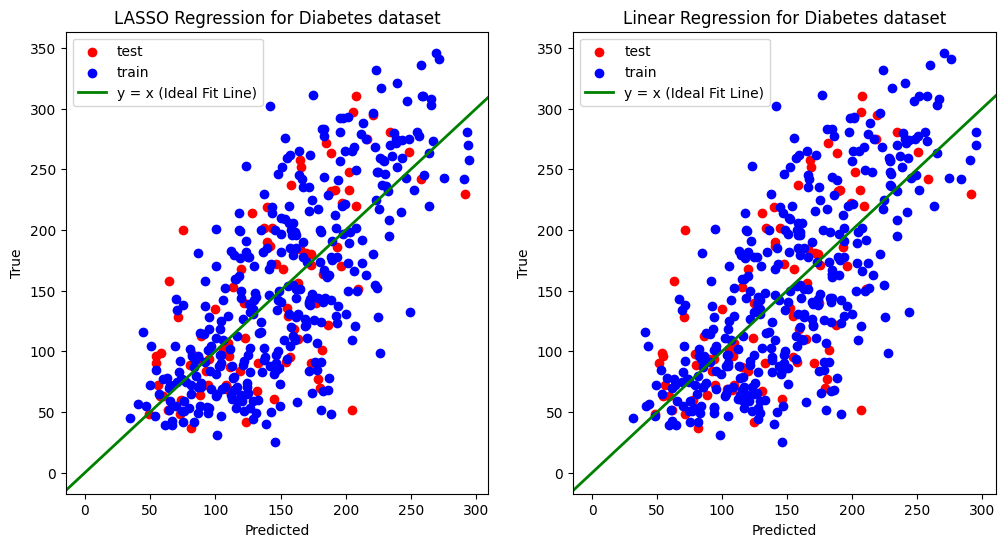

In [56]:
print(f'LASSO R^2 Score: {r2_score_lasso:.5f}')
print(f'Linear Regresssion R^2 Score: {r2_score_linear:.5f}')

#Plot two figures
fig, ax = plt.subplots(1, 2, figsize=(12, 6))

ax[0].scatter(lasso_opt.predict(X_test), y_test, color="red", label='test')
ax[0].scatter(lasso_opt.predict(X_train), y_train, color='blue', label='train')
ax[0].set_title('LASSO Regression for Diabetes dataset')
ax[0].set_xlabel('Predicted')
ax[0].set_ylabel('True')
ax[0].axline((0, 0), slope=1, color='green', lw=2, label='y = x (Ideal Fit Line)') # draw a linear line
ax[0].legend()

ax[1].scatter(linear_regr.predict(X_test), y_test, color="red", label='test')
ax[1].scatter(linear_regr.predict(X_train), y_train, color='blue', label='train')
ax[1].set_title('Linear Regression for Diabetes dataset')
ax[1].set_xlabel('Predicted')
ax[1].set_ylabel('True')
ax[1].axline((0, 0), slope=1, color='green', lw=2, label='y = x (Ideal Fit Line)') # draw a linear line
ax[1].legend()

plt.show()

## Comparative Insights into LASSO and Linear Regression Models for the Diabetes Dataset
The coefficient of determination ($R^2$) was almost same with LASSO (0.45605) and Linear Regression (0.45260) for the diabetes dataset. This means the performance of LASSO and linear regression is almost same here.
This may mean that this dataset is not so complex so that simple linear regression can work enough for the dataset while Regularization applied by LASSO is not particularly effective for this specific dataset.